### Importación de datos



In [47]:
import pandas as pd
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(n=10)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175


#1. Análisis de facturación



In [48]:


tiendas = [tienda,tienda2,tienda3,tienda4]
ingresosPorTiendas = []
for element in tiendas:
    ingreso = sum(element['Precio'].to_list())
    ingresosPorTiendas.append(ingreso)
ingresosPorTiendas
tienda_fc = {f'tienda {str(i+1)}': ingresosPorTiendas[i] for i, value in enumerate(ingresosPorTiendas) }



In [49]:
###Totales de facturación por tienda

for key, value in tienda_fc.items():
    print(f"Total de facturación {key}: ${value}")

Total de facturación tienda 1: $1150880400.0
Total de facturación tienda 2: $1116343500.0
Total de facturación tienda 3: $1098019600.0
Total de facturación tienda 4: $1038375700.0


<BarContainer object of 4 artists>

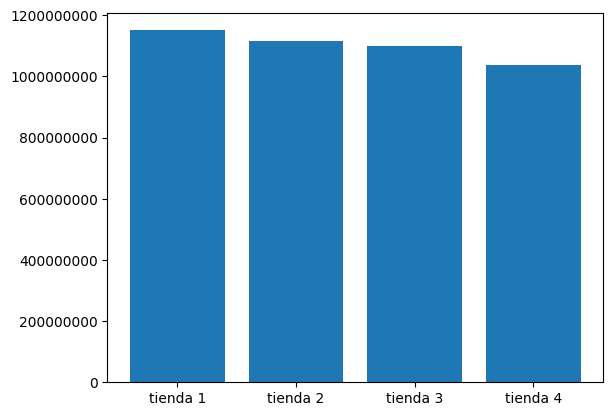

In [50]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.bar(list(tienda_fc.keys()),list(tienda_fc.values()))



# 2. Ventas por categoría

In [51]:

def ventasPorCategoria(tienda: pd.DataFrame) -> dict:
    categoriasTienda = set(tienda['Categoría del Producto'].to_list())
    categoriasTotales = (tienda['Categoría del Producto'].to_list())
    preciosTotales = (tienda['Precio'].to_list())

    cat_Total_tienda = list(zip(categoriasTotales,preciosTotales))
    totalPorCategoria = []
    for cat in categoriasTienda:
        subtotal = 0
        for item in cat_Total_tienda:
          if (cat == item[0]):
              subtotal = subtotal + item[1]
        totalPorCategoria.append(subtotal)
    return dict(zip(categoriasTienda, totalPorCategoria))

def reportar_Totales(totales: dict):
  print("Ventas por categoría\n")
  for k,v in sorted(totales.items()):
      print(f'{k}: ${v}')





In [60]:
def ejercicio2VentasPorCat(tiendas: list):
    totales = []
    for tienda in tiendas:
        total = ventasPorCategoria(tienda)
        totales.append(total)
    return totales

total_por_Categoria_1 = ventasPorCategoria(tienda=tienda)
total_por_Categoria_2 = ventasPorCategoria(tienda=tienda2)
total_por_Categoria_3 = ventasPorCategoria(tienda=tienda3)
total_por_Categoria_4 = ventasPorCategoria(tienda=tienda4)

totales = ejercicio2VentasPorCat(tiendas)


def reportar_Totales(totales: list):
  print("Ventas por categoría\n")
  for i, total in enumerate(totales):
     print(f"\nTienda {i+1}:\n")
     for k,v in sorted(total.items()):
        print(f"{k}: ${v}")

reportar_Totales(totales)

Ventas por categoría


Tienda 1:

Artículos para el hogar: $12698400.0
Deportes y diversión: $39290000.0
Electrodomésticos: $363685200.0
Electrónicos: $429493500.0
Instrumentos musicales: $91299000.0
Juguetes: $17995700.0
Libros: $8784900.0
Muebles: $187633700.0

Tienda 2:

Artículos para el hogar: $14746900.0
Deportes y diversión: $34744500.0
Electrodomésticos: $348567800.0
Electrónicos: $410831100.0
Instrumentos musicales: $104990300.0
Juguetes: $15945400.0
Libros: $10091200.0
Muebles: $176426300.0

Tienda 3:

Artículos para el hogar: $15060000.0
Deportes y diversión: $35593100.0
Electrodomésticos: $329237900.0
Electrónicos: $410775800.0
Instrumentos musicales: $77380900.0
Juguetes: $19401100.0
Libros: $9498700.0
Muebles: $201072100.0

Tienda 4:

Artículos para el hogar: $15074500.0
Deportes y diversión: $33350100.0
Electrodomésticos: $283260200.0
Electrónicos: $409476100.0
Instrumentos musicales: $75102400.0
Juguetes: $20262200.0
Libros: $9321300.0
Muebles: $192528900.0


# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda